# Prunning Methods

### Training and Testing

In [1]:
import torch 
import pandas as pd
import numpy as np
from torchvision import datasets, transforms
from neural_networks import Lenet5_Based_Model
from train import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Runing in {device}")

Runing in cpu


In [3]:
torch.manual_seed(42)
nsamples = 50

transform = transforms.Compose([
    transforms.ToTensor() 
])

dataset1 = datasets.MNIST('../data', train=True, download=True,transform=transform)
dataset2 = datasets.MNIST('../data', train=False,transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,batch_size=nsamples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2,batch_size=nsamples, shuffle=True)

In [4]:
model = Lenet5_Based_Model().to(device)

Batch 1:
Imagens (data): torch.Size([50, 1, 28, 28])
Rótulos (target): torch.Size([50])


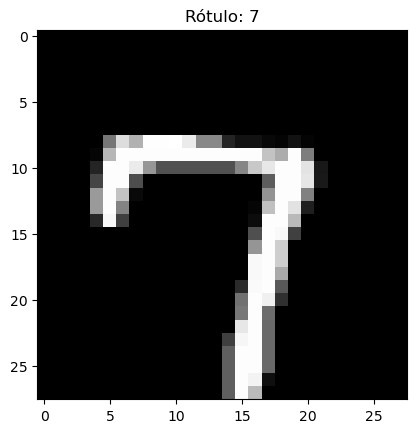

In [5]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(f'Batch {batch_idx + 1}:')
    print('Imagens (data):', data.size())
    print('Rótulos (target):', target.size())


    plt.imshow(data[0].squeeze(), cmap='gray')
    plt.title(f'Rótulo: {target[0].item()}')
    plt.show()
    break

Train Epoch: 0 
 Loss: 2.318635940551758 
 Acurracy: 6.666666740784422e-05
Train Epoch: 50 
 Loss: 0.5258266925811768 
 Acurracy: 0.022749999538064003
Train Epoch: 100 
 Loss: 0.1965215802192688 
 Acurracy: 0.05963333323597908
Train Epoch: 150 
 Loss: 0.076575368642807 
 Acurracy: 0.09803333133459091
Train Epoch: 200 
 Loss: 0.22576943039894104 
 Acurracy: 0.13671666383743286
Train Epoch: 250 
 Loss: 0.19177186489105225 
 Acurracy: 0.17648333311080933
Train Epoch: 300 
 Loss: 0.21117816865444183 
 Acurracy: 0.21641667187213898
Train Epoch: 350 
 Loss: 0.1709216684103012 
 Acurracy: 0.25635001063346863
Train Epoch: 400 
 Loss: 0.03463544324040413 
 Acurracy: 0.2966499924659729
Train Epoch: 450 
 Loss: 0.21555742621421814 
 Acurracy: 0.3370499908924103
Train Epoch: 500 
 Loss: 0.025831537321209908 
 Acurracy: 0.3772999942302704
Train Epoch: 550 
 Loss: 0.5150388479232788 
 Acurracy: 0.4178333282470703
Train Epoch: 600 
 Loss: 0.2892397940158844 
 Acurracy: 0.4581499993801117
Train Epoch:

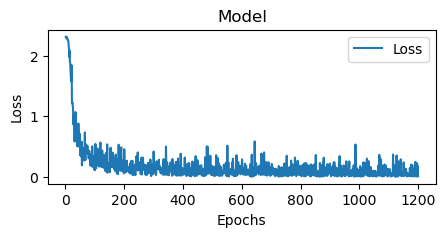

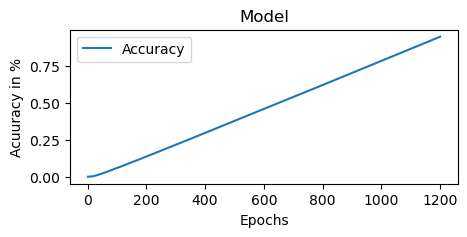

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

In [7]:
test(model,device,test_loader)

Test Loss: 0.00140305859525688 
 Acurracy 0.9782


### Winning tickets

In [8]:
def mask_weights(x):
    if x < -7:
        return 0
    else:
        return 1

In [9]:
W = list(model.parameters())
i = 0

array = []

for weight in W:
    j=0
    for neuron in weight:
        j+=1
        if i % 2 == 0:
            min = torch.min(neuron)
            print(f'Parameter {i} Neuron {j}')
            print(min.item())
            array.append(min.item())
        else:
            print(f'Parameter {i-1} Bias {j}')
            print(neuron)
    i+=1
    if i >=2 :
        break

array_np = np.array(array)
print(np.median(array_np))

Parameter 0 Neuron 1
-0.42632246017456055
Parameter 0 Neuron 2
-0.37471291422843933
Parameter 0 Neuron 3
-0.3617703318595886
Parameter 0 Neuron 4
-0.4652859568595886
Parameter 0 Neuron 5
-0.9130353927612305
Parameter 0 Neuron 6
-0.5412848591804504
Parameter 0 Bias 1
tensor(-0.0204, grad_fn=<UnbindBackward0>)
Parameter 0 Bias 2
tensor(-0.0428, grad_fn=<UnbindBackward0>)
Parameter 0 Bias 3
tensor(-0.1623, grad_fn=<UnbindBackward0>)
Parameter 0 Bias 4
tensor(-0.1281, grad_fn=<UnbindBackward0>)
Parameter 0 Bias 5
tensor(0.0767, grad_fn=<UnbindBackward0>)
Parameter 0 Bias 6
tensor(-0.0170, grad_fn=<UnbindBackward0>)
-0.4458042085170746
